In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

(array([False, False, False,  True,  True,  True]),
 array([ True,  True,  True, False, False, False]))

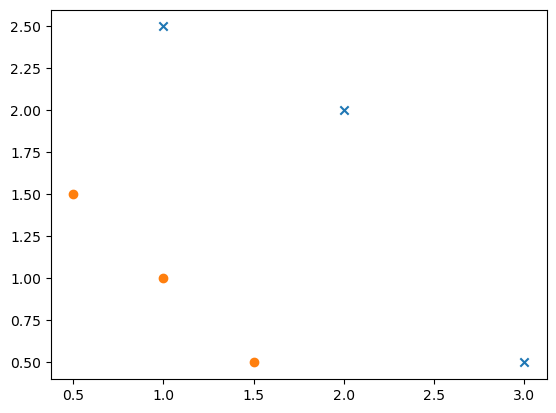

In [2]:
x = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y = np.array([0, 0, 0, 1, 1, 1])  # n

pos = y == 1
neg = y == 0
plt.scatter(x[pos, 0], x[pos, 1], marker="x", label="Positive Class")
plt.scatter(x[neg, 0], x[neg, 1], marker="o", label="Negative Class")
pos, neg

In [11]:
# logistic function
def sigmoid(z):
    gz = 1 / (1 + np.exp(-z))
    return gz

# Cost function
def cost_fn(X, y, w, b):
    m = len(X)
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i], w) + b
        f_wb_i = sigmoid(z_i)
        cost += -y[i] * np.log(f_wb_i) - (1 - y[i]) * np.log(1 - f_wb_i)

    cost = cost / m
    return cost

# Gradient Descent For Logistic Regression
def gradient_descent(X, y, w, b, alpha, iterator):
    m = len(X)
    
    for _ in range(iterator):
        z = np.dot(X, w) + b
        f_wb = sigmoid(z)
        dw = (1/m) * np.dot(X.T, (f_wb - y))
        db = (1/m) * np.sum(f_wb - y)
        
        w -= alpha * dw
        b -= alpha * db
        
    return w, b

# Initialize weights and bias
w = np.zeros(x.shape[1]) # if x is a 2d array with n features and m samples
# w = 0
b = 0

# Hyperparameters
alpha = 0.1
iterations = 1000

# Call gradient descent function
w_updated, b_updated = gradient_descent(x, y, w, b, alpha, iterations)

# Print updated weights and bias
print("Updated weights:", w_updated)
print("Updated bias:", b_updated)

Updated weights: [2.30457062 2.07622315]
Updated bias: -5.907698379622684


In [12]:
def predict(x, w, b):
    z = np.dot(x, w)+b
    prob = sigmoid(z)
    return np.round(prob)

test = np.array([3, 0.5])
predict(test, w_updated, b_updated)

1.0

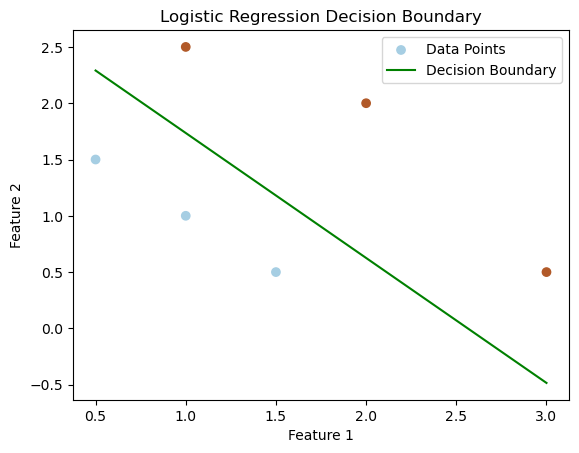

In [134]:
# Calculate the decision boundary
x1_boundary = np.linspace(min(x[:, 0]), max(x[:, 0]), 100)  # Assuming x has shape (num_samples, num_features)
x2_boundary = (-w_updated[0] * x1_boundary - b_updated) / w_updated[1]

# Plot the data points
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Paired, label='Data Points')

# Plot the decision boundary line
plt.plot(x1_boundary, x2_boundary, color='green', label='Decision Boundary')


plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.show()